In [1]:
from make_treemap_Snodes import visualize_treemap, standard_resize
from glob import glob
from tqdm import tqdm
import os

# Eval images (casebases)
----
generates retrieval eval images (microtexts) for V3 and V5 (V4 still exists from previous generation)

In [2]:
from glob import glob
from tqdm import tqdm
from PIL import Image
from make_treemap_Inodes import visualize_treemap, standard_resize
import arguebuf as ab

CASEBASE = "microtexts"
version_dict = {
    "v4": "a",
}

FOLDER = "eval_all"
for version in version_dict:
    split_dir = f"{FOLDER}/casebase/{version}"
    os.makedirs(split_dir, exist_ok=True)
    files = glob(f"graphs/{CASEBASE}/*.json")
    for file in tqdm(files):
        try:
            path = f"{split_dir}/{CASEBASE}-{file.split('/')[-1].split('.')[0]}.png"
            visualize_treemap(file, path)
            standard_resize(path)
        except Exception as e:
            # print(f"Error processing {file}")
            print(e)
            try:
                os.remove(path)
            except:
                pass

100%|██████████| 110/110 [00:04<00:00, 24.18it/s]


# Eval images (queries)
----
generates retrieval eval query images (microtexts) for V3 and V5 (for V4, other color scheme in make_treemap_Inodes is needed)

In [3]:
from make_treemap_Snodes import visualize_treemap, standard_resize
CASEBASE = "microtexts"
version_dict = {
    "v5": "dot",
}
queries = ["microtexts-retrieval-complex", "microtexts-retrieval-simple"]

FOLDER = "eval_all"
for queryset in queries:
    for version in version_dict:
        split_dir = f"{FOLDER}/{queryset}/{version}"
        os.makedirs(split_dir, exist_ok=True)
        files = glob(f"retrieval_queries/{queryset}/*.json")
        for file in tqdm(files):
            try:
                path = f"{split_dir}/microtexts-{file.split('/')[-1].split('.')[0]}.png"
                visualize_treemap(file, path)
                standard_resize(path)                
            except Exception as e:
                # print(f"Error processing {file}")
                print(e)
                try:
                    os.remove(path)
                except:
                    pass

100%|██████████| 24/24 [00:01<00:00, 22.15it/s]


# Training corpus
----
V3, V5 (for V4, other color scheme in make_treemap_Inodes is needed)

In [15]:
data_structure = {
    "train": {
        "araucaria": "json",
        "iac": "json",
        "kialo-graphnli": "json",
        "persuasive-essays": "ann",
        "qt30": "json",
        "us-2016": "json",
    },
    "val": {
        "microtexts": "json",
    }
}

In [17]:
FOLDER = "treemaps_sat_ft"
for split in data_structure:
    split_dir = f"{FOLDER}/{split}"
    os.makedirs(split_dir, exist_ok=True)
    for dsname, ext in data_structure[split].items():
        print(f"Processing {dsname} {split} split")
        files = glob(f"graphs/{dsname}/*.{ext}")
        for file in tqdm(files):
            try:
                visualize_treemap(file, f"{split_dir}/{dsname}-{file.split('/')[-1].split('.')[0]}.png")
                standard_resize(f"{split_dir}/{dsname}-{file.split('/')[-1].split('.')[0]}.png")
            except Exception as e:
                # print(f"Error processing {file}")
                # print(e)
                pass

Processing araucaria train split


100%|██████████| 662/662 [00:29<00:00, 22.57it/s]


Processing iac train split


100%|██████████| 1808/1808 [00:49<00:00, 36.84it/s]


Processing kialo-graphnli train split


100%|██████████| 1560/1560 [06:46<00:00,  3.83it/s]


Processing persuasive-essays train split


100%|██████████| 402/402 [00:14<00:00, 28.35it/s]


Processing qt30 train split


100%|██████████| 1484/1484 [00:45<00:00, 32.77it/s]


Processing us-2016 train split


100%|██████████| 499/499 [00:13<00:00, 36.86it/s]


Processing microtexts val split


100%|██████████| 110/110 [00:03<00:00, 35.82it/s]


In [18]:
from datasets import load_dataset
ds = load_dataset('imagefolder', data_dir=FOLDER)
ds.push_to_hub("kblw/treemap_sat_ft")

Resolving data files:   0%|          | 0/2533 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/54 [00:00<?, ?it/s]

Extracting data files: 0it [00:00, ?it/s]

Extracting data files: 0it [00:00, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Generating validation split: 0 examples [00:00, ? examples/s]

Uploading the dataset shards:   0%|          | 0/1 [00:00<?, ?it/s]

Map:   0%|          | 0/2533 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/26 [00:00<?, ?ba/s]

Uploading the dataset shards:   0%|          | 0/1 [00:00<?, ?it/s]

Map:   0%|          | 0/54 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/1 [00:00<?, ?ba/s]

In [9]:
from datasets import load_dataset
ds = load_dataset('imagefolder', data_dir=FOLDER)
ds.push_to_hub("kblw/treemap_weak_ft")

Resolving data files:   0%|          | 0/2322 [00:00<?, ?it/s]

Extracting data files: 0it [00:00, ?it/s]

Extracting data files: 0it [00:00, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Generating validation split: 0 examples [00:00, ? examples/s]

Uploading the dataset shards:   0%|          | 0/1 [00:00<?, ?it/s]

Map:   0%|          | 0/2322 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/24 [00:00<?, ?ba/s]

Uploading the dataset shards:   0%|          | 0/1 [00:00<?, ?it/s]

Map:   0%|          | 0/1 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/1 [00:00<?, ?ba/s]

README.md:   0%|          | 0.00/499 [00:00<?, ?B/s]

In [2]:
from datasets import load_dataset
ds = load_dataset('imagefolder', data_dir="twopi")
ds.push_to_hub("kblw/graphimages_twopi")

Resolving data files:   0%|          | 0/4705 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/88 [00:00<?, ?it/s]

Extracting data files: 0it [00:00, ?it/s]

Extracting data files: 0it [00:00, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Generating validation split: 0 examples [00:00, ? examples/s]

Uploading the dataset shards:   0%|          | 0/1 [00:00<?, ?it/s]

Map:   0%|          | 0/4705 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/48 [00:00<?, ?ba/s]

Uploading the dataset shards:   0%|          | 0/1 [00:00<?, ?it/s]

Map:   0%|          | 0/88 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/1 [00:00<?, ?ba/s]

README.md:   0%|          | 0.00/598 [00:00<?, ?B/s]

In [1]:
from datasets import load_dataset
ds = load_dataset('imagefolder', data_dir="dot")
ds.push_to_hub("kblw/graphimages_dot")

Resolving data files:   0%|          | 0/4726 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/83 [00:00<?, ?it/s]

Extracting data files: 0it [00:00, ?it/s]

Extracting data files: 0it [00:00, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Generating validation split: 0 examples [00:00, ? examples/s]

Uploading the dataset shards:   0%|          | 0/1 [00:00<?, ?it/s]

Map:   0%|          | 0/4726 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/48 [00:00<?, ?ba/s]

Uploading the dataset shards:   0%|          | 0/1 [00:00<?, ?it/s]

Map:   0%|          | 0/83 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/1 [00:00<?, ?ba/s]

README.md:   0%|          | 0.00/382 [00:00<?, ?B/s]

In [4]:
# for some reason, the images have to be resized, as they have a white padding which is not uniform
from glob import glob
from PIL import Image
from tqdm import tqdm

for file in tqdm(glob("new_ds/*/*.png")):
    try:
        img = Image.open(file)
        img = img.crop((img.width/2-177, img.height/2-182, img.width/2+192, img.height/2+187)).resize((256, 256))
        img.save(file)
    except Exception as e:
        print(f"Error processing {file}")
        print(e)

  0%|          | 0/6459 [00:00<?, ?it/s]

100%|██████████| 6459/6459 [00:40<00:00, 159.92it/s]


In [10]:
from datasets import load_dataset
dataset = load_dataset("imagefolder", data_dir="new_ds")

Resolving data files:   0%|          | 0/2335 [00:00<?, ?it/s]

Extracting data files: 0it [00:00, ?it/s]

Extracting data files: 0it [00:00, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Generating validation split: 0 examples [00:00, ? examples/s]

In [11]:
dataset

DatasetDict({
    train: Dataset({
        features: ['image', 'label'],
        num_rows: 2335
    })
    validation: Dataset({
        features: ['image', 'label'],
        num_rows: 4
    })
})

In [12]:
ds = dataset["train"].train_test_split(test_size=0.1)

In [13]:
ds["validation"] = dataset["validation"]
ds

DatasetDict({
    train: Dataset({
        features: ['image', 'label'],
        num_rows: 2101
    })
    test: Dataset({
        features: ['image', 'label'],
        num_rows: 234
    })
    validation: Dataset({
        features: ['image', 'label'],
        num_rows: 4
    })
})

In [14]:
ds.push_to_hub("kblw/graphviz_treemap")

Uploading the dataset shards:   0%|          | 0/1 [00:00<?, ?it/s]

Map:   0%|          | 0/2101 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/22 [00:00<?, ?ba/s]

Uploading the dataset shards:   0%|          | 0/1 [00:00<?, ?it/s]

Map:   0%|          | 0/234 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/3 [00:00<?, ?ba/s]

Uploading the dataset shards:   0%|          | 0/1 [00:00<?, ?it/s]

Map:   0%|          | 0/4 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/1 [00:00<?, ?ba/s]

README.md:   0%|          | 0.00/617 [00:00<?, ?B/s]

# Actual Pre-Training Dataset

To use graphs from arguebase private, just add those to the datastructure dict. Nothing has to be changed.
So, this will only concern sampling sub graphs from huge social network graphs or similar.

In [3]:

import arguebuf as ab

class BuildArguebufGraphFromEdgelist:

    def __init__(self) -> None:
        self.nodes = set()
        self.edges = []
        self.node_mapping = {}
    
    def add_edge(self, source: str, target: str) -> None:
        self.nodes.add(source)
        self.nodes.add(target)
        self.edges.append((source, target))

    def build(self) -> ab.Graph:
        graph = ab.Graph()
        for label in self.nodes:
            node = ab.AtomNode(label)
            self.node_mapping[label] = node
            graph.add_node(node)
        for source, target in self.edges:
            graph.add_edge(ab.Edge(self.node_mapping[source], self.node_mapping[target]))
        print(graph.edges)
        return graph



In [39]:
from uuid import uuid4
from random import randint

MAX_DEPTH = 9
MAX_BRANCHING_DEGREE = 7

def generate_tree(max_depth, depth: int = 0):
    if depth >= max_depth:
        return {"id": str(uuid4()), "children": []}
    return {"id": str(uuid4()), "children": [generate_tree(max_depth, depth+1) for _ in range(randint(0, max(2, MAX_BRANCHING_DEGREE - depth)))]}

In [42]:
# generate random graphs
from create_data import get_treemap_rects, draw_treemap, standard_resize
from tqdm import tqdm
width = 256
height = 256
savepath = "pt-source/images/"

def generate_random_graphs(thread_num: int, k: int = 100):
    for i in tqdm(range(k)):
        md = randint(1, MAX_DEPTH)
        tree = generate_tree(md)
        rects = get_treemap_rects(tree, 0, 0, width, height, True)
        path = f"{savepath}{thread_num}-{i}.png"
        draw_treemap(rects, height, width, path)
        standard_resize(path)
        # print(f"Generated {i+1} graphs")

from multiprocessing import Pool

NUM_PROCESSES = 12

with Pool(NUM_PROCESSES) as p:
    p.map(generate_random_graphs, range(NUM_PROCESSES))




100%|██████████| 100/100 [00:23<00:00,  4.19it/s]


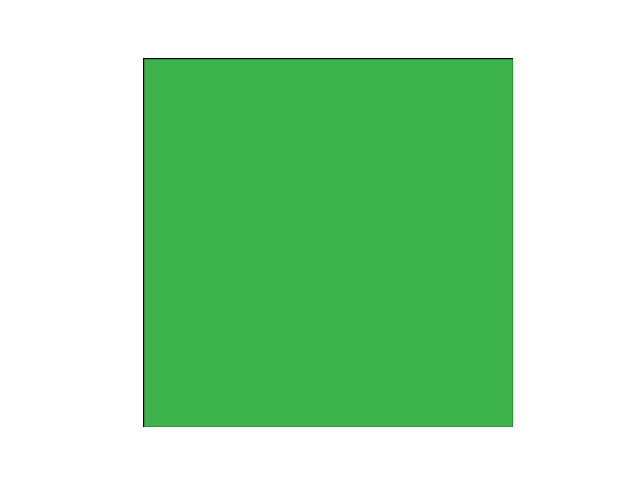

In [1]:
graphpath = "graphs/microtexts/nodeset6361.json"
from make_treemap_Snodes import visualize_treemap

visualize_treemap(graphpath, "test.png")
from PIL import Image
Image.open("test.png")

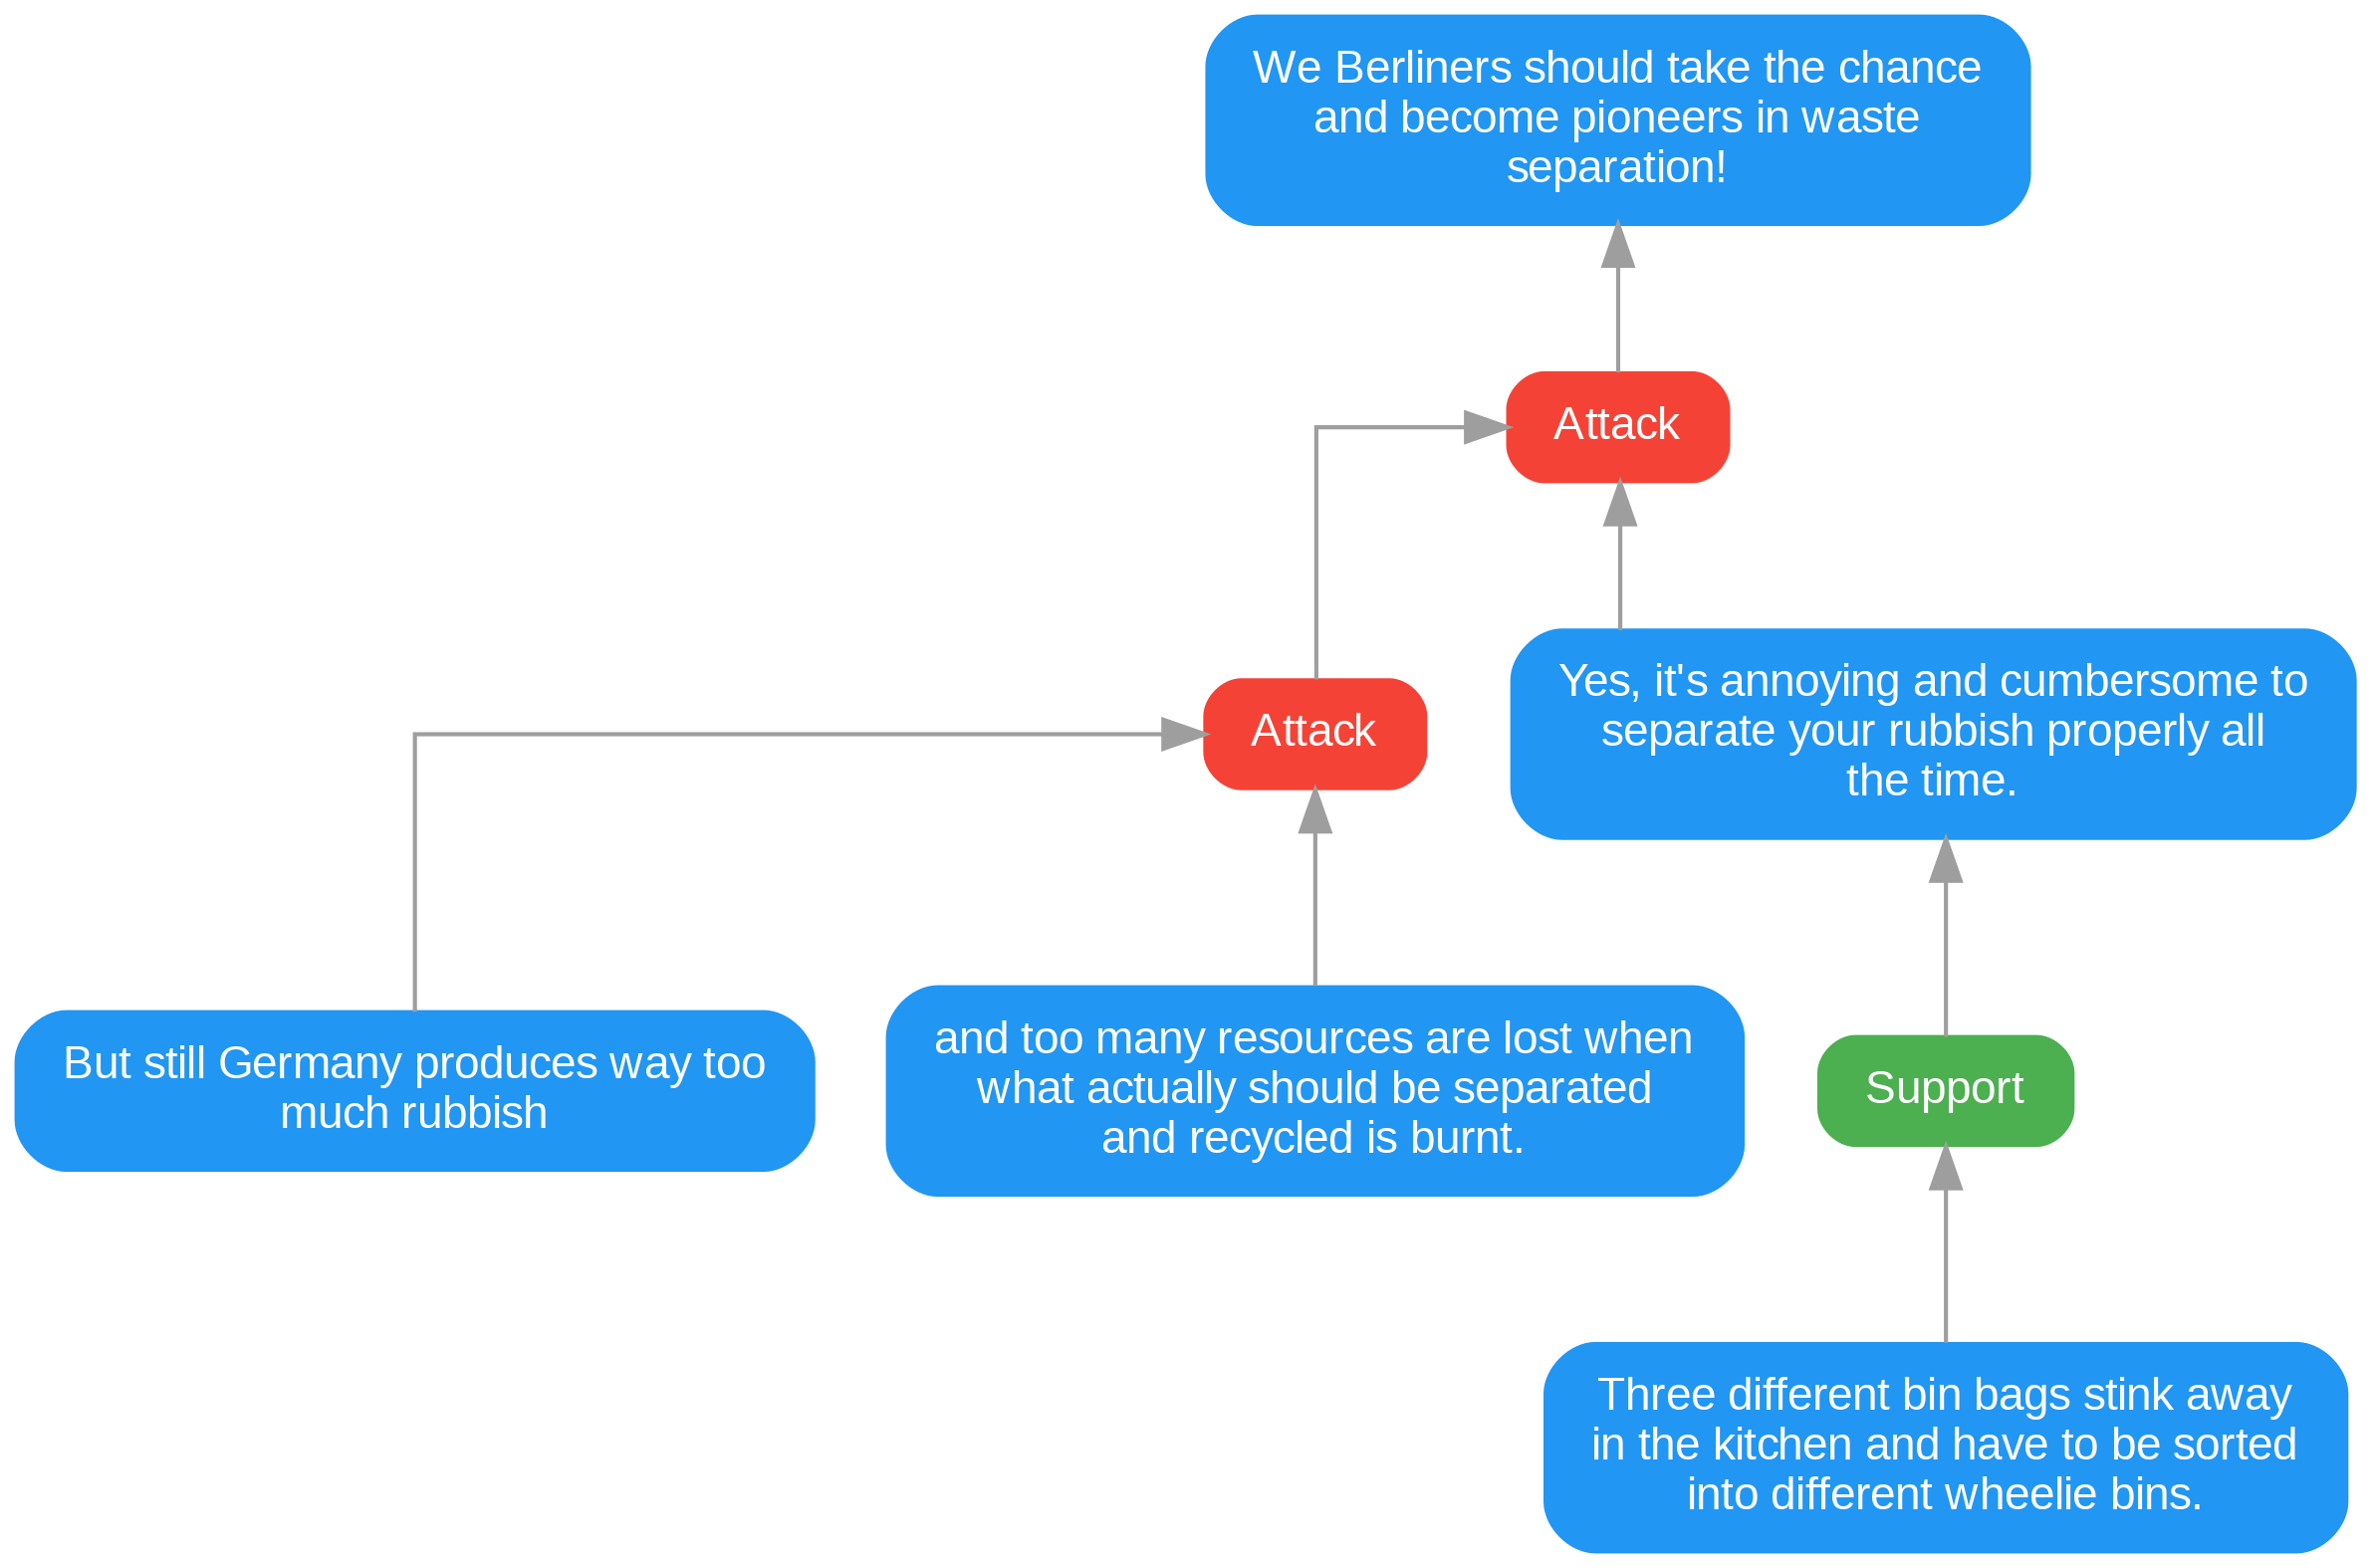

In [2]:
import arguebuf as ab
graph = ab.load.file(graphpath)
ab.render.graphviz(ab.dump.graphviz(graph), "test2.png")
Image.open("test2.png")

In [2]:
from datasets import load_dataset
dataset = load_dataset("imagefolder", data_dir="pt-source/images")

Resolving data files:   0%|          | 0/415640 [00:00<?, ?it/s]

Extracting data files: 0it [00:00, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

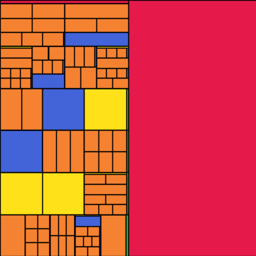

In [6]:
dataset["train"][250]["image"]

In [8]:
dataset = dataset["train"].train_test_split(test_size=0.1, seed=42)
dataset

DatasetDict({
    train: Dataset({
        features: ['image'],
        num_rows: 374076
    })
    test: Dataset({
        features: ['image'],
        num_rows: 41564
    })
})